In [27]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#reading the data
# copy it in df so that original data is safe .

loan_data = pd.read_csv("loan.csv")
df = loan_data

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/2198617676.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv")


In [29]:
## Step 3:- The head() method returns a specified number of rows, string from the top

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [30]:
## Step 4:- 
#When it comes to the analysis of data and its variants, it is extremely important to realize the volume of data. 
#That is, before we plan to analyze the data and perform synthesis on it, we need to be aware of the dimensions of the data.
#This is when the Python shape() method comes into the picture.


df.shape

(39717, 111)

In [31]:
# Step 5 :-
# to know the null values in data base , returns the number of missing values in the dataset.


df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## Let's remove columns with all null values

In [33]:
# Step 6:- 

# We have to remove the null/missing values
# DROPNA ()- The dropna() method removes the rows that contains NULL values. 
# The dropna() method returns a new DataFrame object unless the inplace parameter is set to True.
# When using the dropna() method, the axis, how, and inplace parameters can be specified as follows:
# HOW:- Optional, default 'any'. Specifies whether to remove the row or column when ALL values are NULL, or if ANY value is NULL.


df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Removing single valued columns

In [35]:
df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Now we have 48 columns out of which some correspond to the post approval of loan
- The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


- So we can safely remove the columns / variables which are not needed for this scenario.
- Also remove those columns which doesnt contribute to the identify loan defaulting such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". 
  
- "desc" no need
- "out_prncp_inv" , "total_pymnt_inv " are not useful contributing to the loan defaulting analysis. So removing them. 


In [37]:
df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [38]:
df.shape

(39717, 21)

In [39]:
# It returns an Index object representing the names of the columns in the DataFrame.

df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

###  The aim is to identify patterns which indicate if a person is likely to default and this can only be identified in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- so removing them

In [41]:
#unique() function is used to extract the unique values from a Series (a single column) or a DataFrame (multiple columns).



df_defaulter = df[df.loan_status != "Current"]
df_defaulter.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values in current DF_DEFAULTER

In [43]:
# Percentage of missing values
# Identification of Missing values


(df_defaulter.isna().sum()/len(df_defaulter.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

## Handling Missing values
 - Missing Values Column --> "emp_length", "revol_util".
 - emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

# Strategy:  
 - Column Data type we have to find out

In [45]:
df_defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null  obje

In [46]:
# For categorical columns we prefer to use mode.
# mode is not coming directly its coming with a index. So to fetch the value we need to pass the value with index.
# . value_counts() method is a convenient way to count the number of occurrences of each unique value
# the mode is the value that is repeatedly occurring in a given setZ

print("Mode : " + df_defaulter.emp_length.mode()[0])
df_defaulter.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

### The above value counts shows that the mode value has far higher frequency or appears more frequently,than that of the next most frequent value. 
- replace/impute all missing values with the value of mode.

In [48]:
# Fillna function will replace/impute all missing values of emp_length column with mode value i.e. '10'
# isna() method checks whether the objects of a Dataframe or a Series contain missing or null values (NA, NaN) 


df_defaulter.emp_length.fillna(df_defaulter.emp_length.mode()[0], inplace = True)
df_defaulter.emp_length.isna().sum()

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/595575397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulter.emp_length.fillna(df_defaulter.emp_length.mode()[0], inplace = True)


0

In [49]:
# subset parameter in the dropna() function allows you to specify the columns where you want to check for missing values.
# dropna() method removes the rows that contains NULL values.


df_defaulter.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df_defaulter.revol_util.isna().sum()

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/1946947460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulter.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


0

## Standardizing the data 
- "revol_util" column although described as an object column, it has continous values. 
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable. 

In [51]:
df_defaulter.revol_util = pd.to_numeric(df_defaulter.revol_util.apply(lambda x : x.split('%')[0]))

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/2962473175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulter.revol_util = pd.to_numeric(df_defaulter.revol_util.apply(lambda x : x.split('%')[0]))


In [52]:
df_defaulter.int_rate = pd.to_numeric(df_defaulter.int_rate.apply(lambda x : x.split('%')[0]))

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/2462054127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulter.int_rate = pd.to_numeric(df_defaulter.int_rate.apply(lambda x : x.split('%')[0]))


In [53]:
df_defaulter.emp_length = pd.to_numeric(df_defaulter.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_1385/309089720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulter.emp_length = pd.to_numeric(df_defaulter.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [54]:
df_defaulter.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


## Outlier Treatment

<Axes: ylabel='annual_inc'>

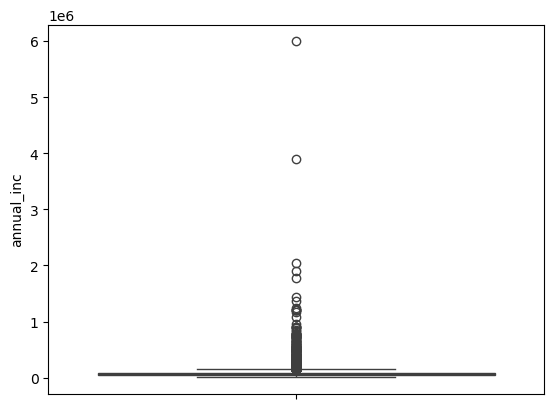

In [56]:
sns.boxplot(df_defaulter['annual_inc'])